#**Bootcamp Data Science Project: Titanic Dataset**#

## Introduction

In the world of data science, one of the most fascinating aspects is the ability to analyze historical events and extract valuable insights that not only help us understand the past but also improve decision-making in the present and future. Historical datasets, such as the Titanic dataset, provide a unique opportunity to apply modern analysis and modeling techniques to real-world situations, allowing us to explore patterns, trends, and key factors that influenced outcomes.

In that sense, the project focuses on predicting the survival of Titanic passengers by leveraging the tools and techniques learned during the Bootcamp. It is structured using the CRISP-DM (Cross-Industry Standard Process for Data Mining) methodology to ensure a systematic and effective approach to data analysis and model development.






## Step 1: Business Understanding

### Objetives

1. Understand the factors that influenced the survival of Titanic passengers to improve decision-making in similar situations in the future.
2. Identify relevant variables for prediction.
3. Develop a predictive model with high evaluations metrics. Example: F1 Score > 0.80
4. Improve the model using techniques as Outliers reduction, PCA and Hyperparameters




##Step 2: Data Understanding##

### A) Initial data.

In [1]:
# Libraries import

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") # Avoid messages of warnings

titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

### B) Description of the Data

In [2]:
titanic.head(3) # Verify the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
titanic.info() # A resume of the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Here we can see a resume of the variables in the project and its type:

| Variable | Type of Variable | Description |
|:----------:|:----------:|:----------:|
| Passenger ID    | Nominal  | Identifier  |
| Survived    | Nominal   |  If the passenger survives is 1, otherwise is 0. It's the target variable to predict  |
| Pclass    | Ordinal   | Socioeconomic Class: 1 Upper, 2 Middle, 3 Lower  |
| Name    | String  | Name + Title  |
| Sex    | Nominal   | Gender of the passenger (male or female)  |
| Age    | Continuous Numerical   | Age of the passengers in years   |
| SibSp    | Discrete Numerical   | Number of siblings or spouses in board   |
| Parch   | Discrete Numerical   | Number of parents and children in board   |
| Ticket   | String   | Ticket number   |
| Fare   | Continuous Numerical   | Price paid for the ticket   |
| Cabin   | String   | Cabin Number of the passenger   |
| Embarked   | Nominal   | The port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).   |



---



### C) Variables

#### Survived

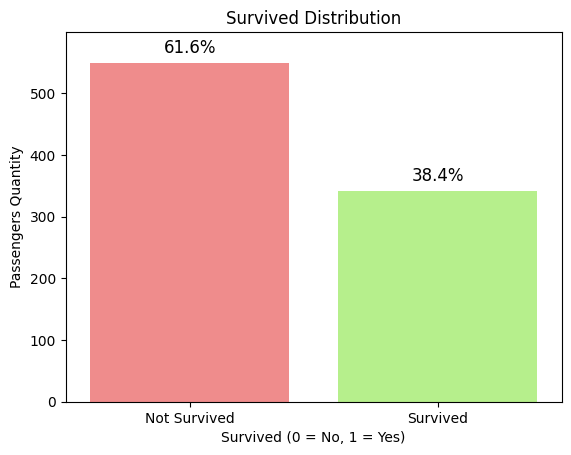

In [5]:
ax = sns.countplot(x='Survived', data=titanic, palette={'0': '#ff7c7c', '1': '#b4ff7c'})

# Percentage Calculation:
total = len(titanic)
for p in ax.patches: # Iterates over each bar in the graph
    height = p.get_height() # Gets the height of the bar (number of passengers)
    ax.text(p.get_x() + p.get_width() / 2., height + 10,  # Text Position (above the bar, in the middle)
            f'{height/total:.1%}',  # Formats the percentage with one decimal place.
            ha='center', va='bottom', fontsize=12, color='black')

# We add legends and additional text:

plt.title('Survived Distribution')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Passengers Quantity')
plt.xticks([0, 1], ['Not Survived', 'Survived'])  # X axis personalized
plt.ylim(0, max(titanic['Survived'].value_counts()) + 50)  # Y axis  personalized
plt.show()

As we can see, 61.6% of the passengers did not survive, compared to the remaining 38.4% who did survive. Now, let's see the relation with some variables:

#### Pclass

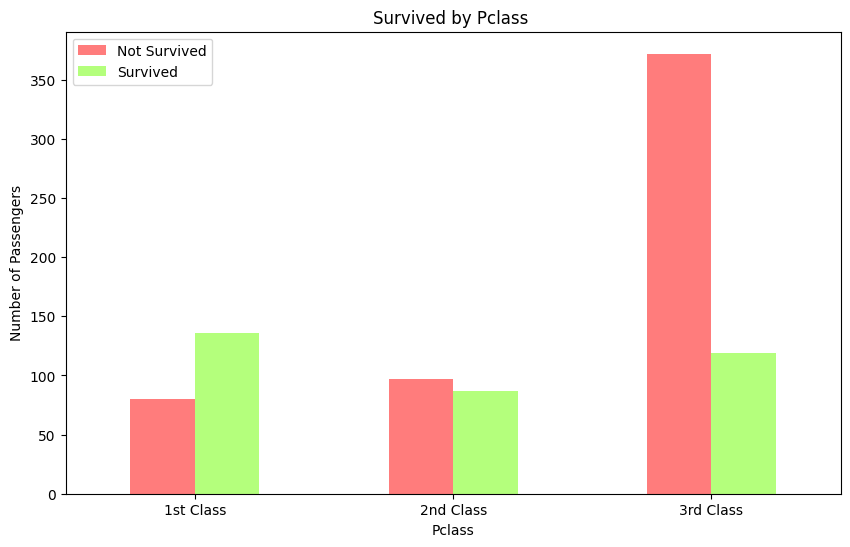

In [6]:
pclass_survival = titanic.groupby(['Pclass', 'Survived']).size().unstack()

# Create the bar:
pclass_survival.plot(kind='bar', stacked=False, figsize=(10, 6), color=['#ff7c7c', '#b4ff7c'])

# Add labels and title
plt.xlabel('Pclass')
plt.ylabel('Number of Passengers')
plt.title('Survived by Pclass ')
plt.xticks(ticks=[0, 1, 2], labels=['1st Class', '2nd Class', '3rd Class'], rotation = 0)
plt.legend(['Not Survived', 'Survived'])
plt.show()

In this graph we can see that:

* 1st Class had the highest number of survivors compared to non-survivors.

* 2nd Class had almost the same number of survivors as non-survivors.

* 3rd Class had the lowest number of survivors and the highest number of non-survivors.

This suggest that there is a significant difference between belonging to a class



#### Name

In [7]:
titanic['Name'].head(10)

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
5,"Moran, Mr. James"
6,"McCarthy, Mr. Timothy J"
7,"Palsson, Master. Gosta Leonard"
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,"Nasser, Mrs. Nicholas (Adele Achem)"


We can see above that the column Name has this structure:

Last Name  ---  Title (Mr,Master,Mrs,...) ---- First Name and more


We can consider this structure for Data Preparation

#### Sex or Gender

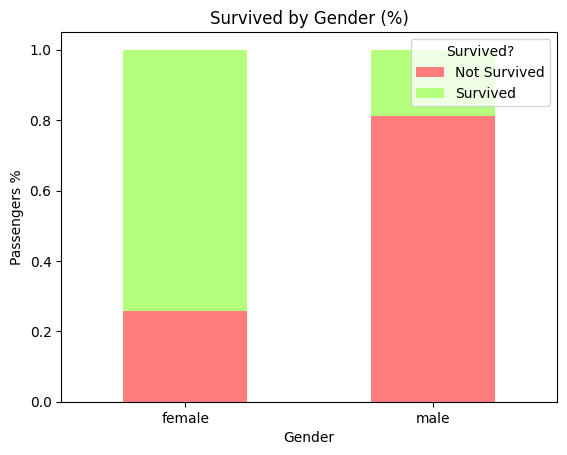

In [8]:
gender_survival = titanic.groupby('Sex')['Survived'].value_counts(normalize=True).unstack()

# Create the graph
gender_survival.plot(kind='bar', stacked=True, color=['#ff7c7c', '#b4ff7c'])

# personalization
plt.title('Survived by Gender (%)')
plt.xlabel('Gender')
plt.ylabel('Passengers %')
plt.legend(title='Survived?', loc='upper right', labels=['Not Survived', 'Survived'])
plt.xticks(rotation=0)  # X axis
plt.show()

We can observe in the graph that there is a significant difference between being a man or a woman in terms of survival. Approximately 80% of the total women survived, while only about 20% of the total men survived. This reflects the well-known principle of "women and children first".

#### Age

In [9]:
print('The quantity of nulls in Age is:',titanic['Age'].isnull().sum()) # Verify the quantity of nulls
print ('The Percentage of nulls compared to the total of dataset is:', round(titanic['Age'].isnull().sum()/len(titanic)*100,2), '%')

The quantity of nulls in Age is: 177
The Percentage of nulls compared to the total of dataset is: 19.87 %


We can see a significate amount of nulls in the variable Age, so we can consider this in Data Preparation

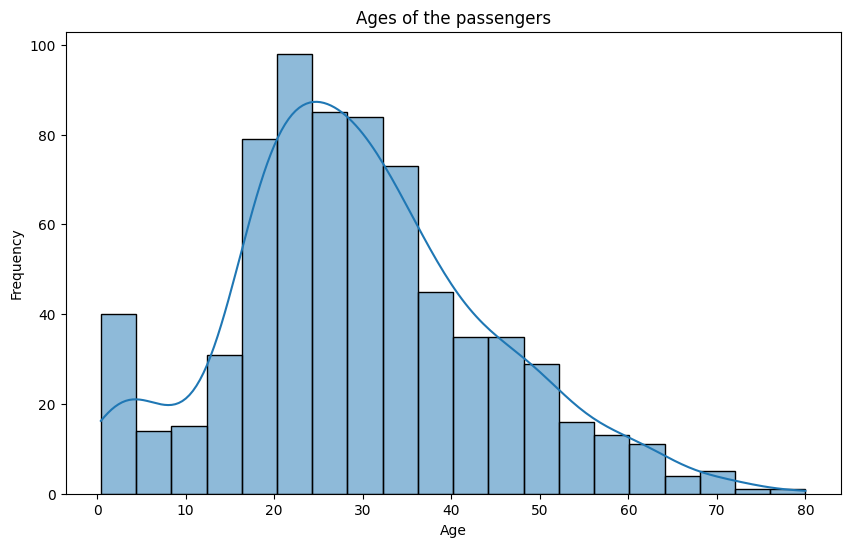

In [10]:
nullsdroped_age = titanic.dropna(subset=['Age']) # We avoid the nulls to see the age's distribution

plt.figure(figsize=(10, 6))
sns.histplot(data=nullsdroped_age, x='Age', kde=True)
plt.title('Ages of the passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

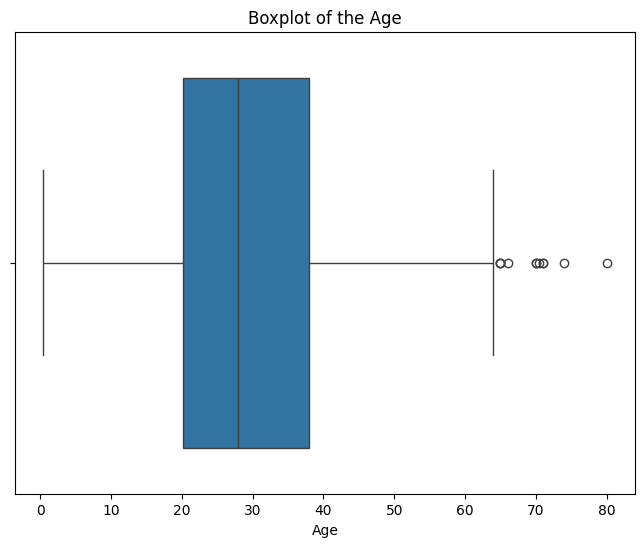

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=nullsdroped_age, x='Age')
plt.title('Boxplot of the Age')
plt.xlabel('Age')
plt.show()

We can reference the two graphs above that:

*   A great amount of the ages are beetween the 20 and 40 years old
*   There's outliers after the age of 60 years old aproximately
*   The distribution is Asimetric Positive, what indicates that the data is concentrated to the left, and we can confirm this, Mean of the age is greater than its Median.



#### SibSp

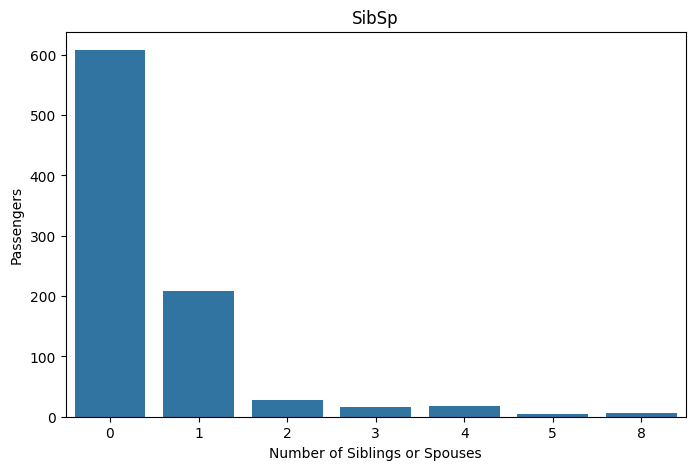

In [74]:
plt.figure(figsize=(8, 5))
sns.countplot(x='SibSp', data=titanic)
plt.title('SibSp')
plt.xlabel('Number of Siblings or Spouses')
plt.ylabel('Passengers')
plt.show()

#### Parch

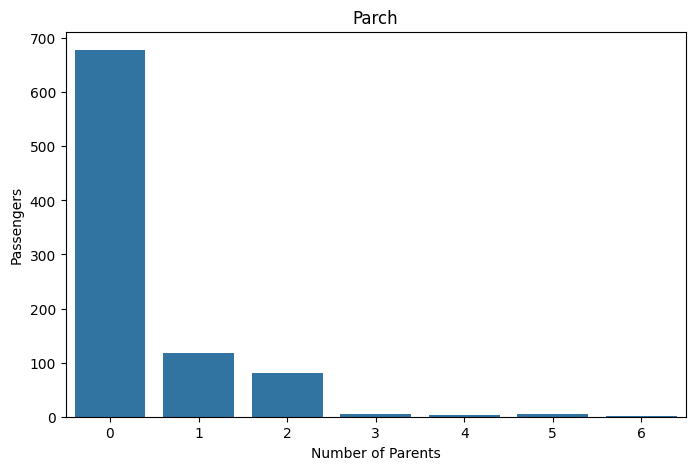

In [75]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Parch', data=titanic)
plt.title('Parch')
plt.xlabel('Number of Parents')
plt.ylabel('Passengers')
plt.show()

#### Ticket

This variable will not be used because the Fare variable and other data such as Cabin and Embarked are more explanatory than the ticket itself, which does not seem to follow a specific pattern.

#### Cabin

In cabin there's a lot of nulls that will be group in Data Preparation

## Step 3: Data Preparation

### Nulls

#### Age

We see the variable 'Age' has 177 Nulls, we can review this. Other Variable that has a lot of nulls is Cabin. Embarked has 2 nulls.

In [12]:
titanic['Age'] = titanic['Age'].replace(np.nan,30) # The mean value of the age aproximately

In [13]:
titanic.isnull().sum() # We confirm

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


#### Cabin

In [14]:
# Extract the letters in 'Cabin' using a regular expression:
titanic['Cabin_Letters'] = titanic['Cabin'].str.extract('([A-Za-z]+)', expand=False)

# Verify
print(titanic[['Cabin', 'Cabin_Letters']].head())

# We drop the column of Cabin
titanic = titanic.drop(['Cabin'], axis=1)

  Cabin Cabin_Letters
0   NaN           NaN
1   C85             C
2   NaN           NaN
3  C123             C
4   NaN           NaN


In [15]:
# We assing values with 'Cabin Letters' by 5 groups, where 'M' is the NaN group

titanic['Cabin_Letters'] = titanic['Cabin_Letters'].replace(['A', 'B', 'C'], 'ABC')
titanic['Cabin_Letters'] = titanic['Cabin_Letters'].replace(['D', 'E'], 'DE')
titanic['Cabin_Letters'] = titanic['Cabin_Letters'].replace(['F', 'G'], 'FG')
titanic['Cabin_Letters'] = titanic['Cabin_Letters'].replace(['T'], 'ABC')
titanic['Cabin_Letters'] = titanic['Cabin_Letters'].fillna('M')

titanic['Cabin_Letters'].value_counts()

,count
Cabin_Letters,
M,687
ABC,122
DE,65
FG,17


#### Embarked

In [16]:
# The missing values are two, we can consider to avoid. However, those missing values is from passengers with the value of 'S' according to the research in kaggle

titanic['Embarked'] = titanic['Embarked'].fillna('S')

In [17]:
titanic.head(3)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            891 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Embarked       891 non-null    object 
 11  Cabin_Letters  891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Nulls Values are already replaced

### Title's Info

We can get info to improve the accuracy of the models if we consider that the name includes a Title as Mr, Ms, Miss, etc. The name has this structure:

Last Name, Title . First Name

Where we can extract the title with this code

In [18]:
titanic['Title_1'] = titanic['Name'].str.split(', ', expand=True)[1] # Extract after the comma
titanic['Title_2'] = titanic['Title_1'].str.split('. ', expand=True)[0] # Extract before the point


In [19]:
titanic = titanic.drop('Title_1', axis = 1) # We drop this auxiliar column
titanic = titanic.rename(columns={'Title_2': 'Title'}) #We rename the column
titanic.head(4) #Review

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Letters,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,M,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,ABC,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,M,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,ABC,Mrs


In [92]:
#titanic['Family_Size'] = titanic['SibSp'] + titanic['Parch'] + 1 (Agruparlo por medio de la cantidad de personas relacionadas disminye 1% la prediccion con el uso de la regresión logistica)

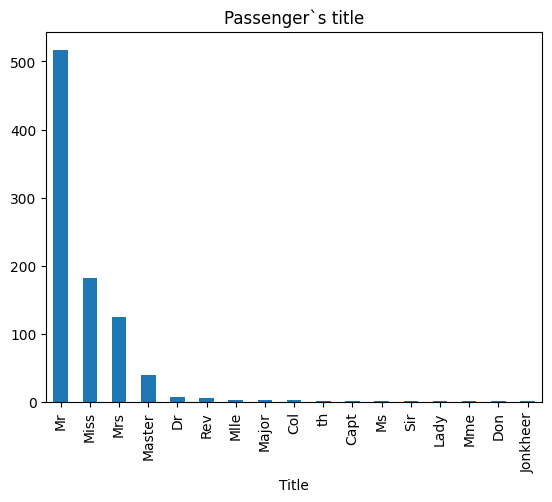

In [20]:
plot = titanic['Title'].value_counts().plot(kind='bar', title='Passenger`s title') # Title's graph

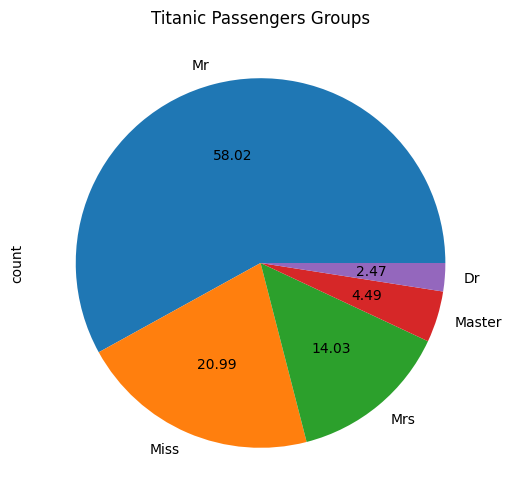

In [21]:
#We can replace the values as Lady as Miss. Also, we can group some titles as Capt as Dr:

titanic['Title'].replace(['Ms', 'Mlle', 'Lady', 'Mme', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev', 'Mlle', 'th'  ],['Miss','Miss','Miss','Miss', 'Dr', 'Dr','Dr','Dr','Dr','Dr','Dr','Miss', 'Dr' ],inplace=True)


plot = titanic['Title'].value_counts().plot(kind='pie', autopct='%.2f',
                                            figsize=(6, 6),
                                            title='Titanic Passengers Groups') #We verify the values with a pie chart

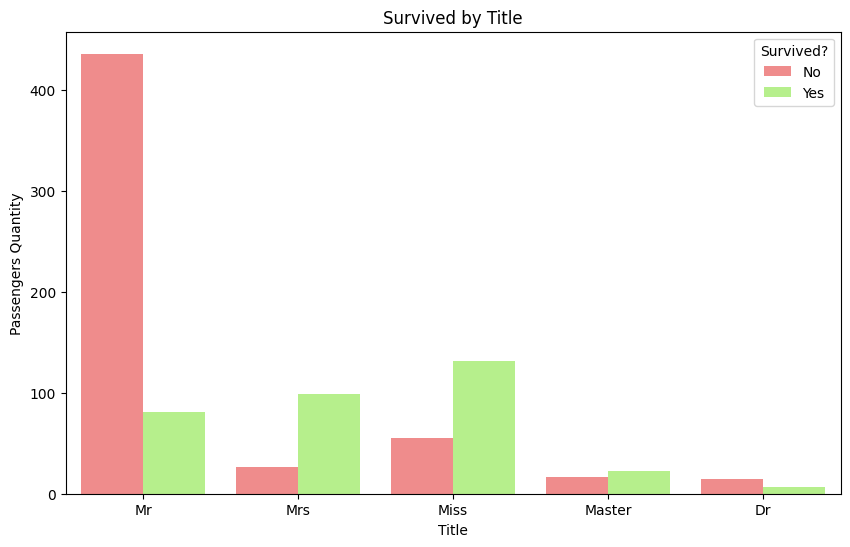

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic, x='Title', hue='Survived', palette={0: '#ff7c7c', 1: '#b4ff7c'})
plt.title('Survived by Title')
plt.xlabel('Title')
plt.ylabel('Passengers Quantity')
plt.legend(title='Survived?', labels=['No', 'Yes'])
plt.show()

We can see with the graph above that:

*   Mrs and Miss concentrate a great amount of the survivors.
*   The mrs group contains the greatest number of survivors compared to non-survivors.
*   The Master group is the group of males that has a great chances to survive.
* The Mr group contains the greatest number of non survivors compared to survivors.



### One Hot Encoding

We implement this method to convert the categorical variables as  Sex and Embarked to numerical variables

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# Hacer Make columns para One Hot Encoder
transformer = make_column_transformer(
    (OneHotEncoder(), ['Sex','Embarked', 'Cabin_Letters']),
    remainder='drop')

transformed = transformer.fit_transform(titanic)
transformed

array([[0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [24]:
transformer.get_feature_names_out()

array(['onehotencoder__Sex_female', 'onehotencoder__Sex_male',
       'onehotencoder__Embarked_C', 'onehotencoder__Embarked_Q',
       'onehotencoder__Embarked_S', 'onehotencoder__Cabin_Letters_ABC',
       'onehotencoder__Cabin_Letters_DE',
       'onehotencoder__Cabin_Letters_FG',
       'onehotencoder__Cabin_Letters_M'], dtype=object)

In [25]:
transformed_df = pd.DataFrame(
    transformed, #datos del dataframe
    columns=transformer.get_feature_names_out().tolist() # nombres de las columnas
)

##Mostrar info
transformed_df.head()

,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,onehotencoder__Cabin_Letters_ABC,onehotencoder__Cabin_Letters_DE,onehotencoder__Cabin_Letters_FG,onehotencoder__Cabin_Letters_M
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [26]:
lista = [transformed_df,titanic.drop(['Sex','Embarked'],axis=1)]

In [27]:
df_transformed= pd.concat(lista,axis=1)
df_transformed.head(3)

,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,onehotencoder__Cabin_Letters_ABC,onehotencoder__Cabin_Letters_DE,onehotencoder__Cabin_Letters_FG,onehotencoder__Cabin_Letters_M,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin_Letters,Title
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,M,Mr
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,ABC,Mrs
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,M,Miss


### Label Encoder

We use the Method Label Encoder for the Title column to transform this to a numerical variable

In [28]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_transformed['Numerical_Title'] = encoder.fit_transform(df_transformed['Title'])
df_transformed.head(3)

,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,onehotencoder__Cabin_Letters_ABC,onehotencoder__Cabin_Letters_DE,onehotencoder__Cabin_Letters_FG,onehotencoder__Cabin_Letters_M,PassengerId,...,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin_Letters,Title,Numerical_Title
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,...,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,M,Mr,3
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2,...,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,ABC,Mrs,4
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3,...,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,M,Miss,2


Here we can see that Label Encoder tranforms the column of title with these values

0 Dr

1 Master

2 Miss

3 Mr

4 Mrs

### Female Married

We also can create a new column called femaleMarried. Mrs is all the females that are married. Mrs has the value of 4 in the column of Numerical Title.

We can get this new column with the code below. We use 1 if fullfill the condition, else is 0

In [29]:
df_transformed['femaleMarried'] = 0
df_transformed['femaleMarried'].loc[df_transformed['Numerical_Title'] == 4] = 1

### Categorical Variables and Numerical Variables

We need to separate the Categorical Variables and the Numeric Variables. The Numeric Variables can be standarized to improve the ML models

In [30]:
 from sklearn.preprocessing import StandardScaler

 df_categorical = df_transformed[['onehotencoder__Sex_female', 'onehotencoder__Sex_male',	'onehotencoder__Embarked_C',	'onehotencoder__Embarked_Q',	'onehotencoder__Embarked_S',	'onehotencoder__Cabin_Letters_ABC',	'onehotencoder__Cabin_Letters_DE',	'onehotencoder__Cabin_Letters_FG', 'onehotencoder__Cabin_Letters_M', 'PassengerId', 'Survived','Pclass','Numerical_Title','femaleMarried']]

 # For a better performance of the models of ML, we'll standarize the numerical values

 df_numerical = df_transformed[['Age','SibSp','Parch','Fare']]
 sc = StandardScaler() # Instance the object
 df_numerical = sc.fit_transform(df_numerical)
 df_numerical = pd.DataFrame(df_numerical, columns=['Age', 'SibSp', 'Parch', 'Fare']) #Convert to dataframe
 df_num = pd.concat([df_categorical.reset_index(drop=True), df_numerical.reset_index(drop=True)], axis=1) # final dataframe

 df_num.head(5)

,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,onehotencoder__Cabin_Letters_ABC,onehotencoder__Cabin_Letters_DE,onehotencoder__Cabin_Letters_FG,onehotencoder__Cabin_Letters_M,PassengerId,Survived,Pclass,Numerical_Title,femaleMarried,Age,SibSp,Parch,Fare
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,3,3,0,-0.597055,0.432793,-0.473674,-0.502445
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2,1,1,4,1,0.634162,0.432793,-0.473674,0.786845
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3,1,3,2,0,-0.289251,-0.474545,-0.473674,-0.488854
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,4,1,1,4,1,0.403309,0.432793,-0.473674,0.420730
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5,0,3,3,0,0.403309,-0.474545,-0.473674,-0.486337


In [31]:
df_num.dropna(inplace = True)
X = df_num.drop('Survived',axis=1)
y = df_num['Survived']

## Step 4: Modeling

### Train and Test Data

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Train y Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


### Machine Learning Models

#### Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

clf = RandomForestClassifier(max_depth=2) # Instance the object
clf.fit(X_train, y_train) # Adjust
y_pred = clf.predict(X_test) #Prediction

precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)
auc_rf = roc_auc_score(y_test, y_pred)

print(precision_rf,recall_rf,f1_rf,auc_rf)

0.7722772277227723 0.7027027027027027 0.7358490566037735 0.7781029437080392


#### KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

neigh = KNeighborsClassifier(n_neighbors=3) #instanciar el objeto
neigh.fit(X_train, y_train) # Ajuste con los datos de titanic
y_pred = neigh.predict(X_test) #Predicción

precision_knn = precision_score(y_test, y_pred)
recall_knn = recall_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred)
auc_knn = roc_auc_score(y_test, y_pred)

print(precision_knn,recall_knn,f1_knn,auc_knn)

0.48717948717948717 0.34234234234234234 0.4021164021164021 0.5437826361393241


#### Logit

In [35]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)


precision_rl = precision_score(y_test, y_pred)
recall_rl = recall_score(y_test, y_pred)
f1_rl = f1_score(y_test, y_pred)
auc_rl = roc_auc_score(y_test, y_pred)

print(precision_rl,recall_rl,f1_rl,auc_rl)

0.7924528301886793 0.7567567567567568 0.7741935483870968 0.8083146841108625


## Step 5: Evaluation

In [36]:
results = {
    'Model': ['Random Forest', 'KNN', 'Logistic Regression'],
    'Precition': [precision_rf, precision_knn, precision_rl],
    'Recall': [recall_rf, recall_knn, recall_rl],
    'F1-Score': [f1_rf, f1_knn, f1_rl],
    'AUC-ROC': [auc_rf, auc_knn, auc_rl]
}

results_df_1 = pd.DataFrame(results)
results_df_1

,Model,Precition,Recall,F1-Score,AUC-ROC
0,Random Forest,0.772277,0.702703,0.735849,0.778103
1,KNN,0.487179,0.342342,0.402116,0.543783
2,Logistic Regression,0.792453,0.756757,0.774194,0.808315


As we can see in the previous table, the logistic regression model is the one that has the highest evaluation metrics with an AUC-ROC > 0.80.

In this case, the use of KNN is not recommended due to its low metrics, such as an AUC-ROC close to 50% (flip a coin)

## Improving the model

###  Hyperparameter Tuning

We can get the best combination of parameters. We'll use Randomized Search CV

In [37]:
from sklearn.model_selection import RandomizedSearchCV

#### Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier()
params_grid = {
        'n_estimators': [10, 100, 200], # El número de árboles en el bosque.
        'max_depth': [3, 5, 7, 10, 15], # La profundidad máxima de cada árbol en el bosque
        'min_samples_split': [2, 5, 10], #El número mínimo de muestras necesarias para dividir un nodo interno.
        'criterion':['entropy','gini']
        }
grid_cv = RandomizedSearchCV(clf, params_grid, scoring="accuracy", n_jobs=-1, cv=3) # Usamos este modelo por su rapidez a la hora de la ejecucion
grid_cv.fit(X_train, y_train)

print("Mejores parametros", grid_cv.best_params_)
print("Mejor score de CV", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 5)}')
precision_rf = precision_score(y_test, grid_cv.predict(X_test))
recall_rf = recall_score(y_test, grid_cv.predict(X_test))
f1_rf = f1_score(y_test, grid_cv.predict(X_test))
auc_rf = roc_auc_score(y_test, grid_cv.predict(X_test))
print(precision_rf,recall_rf,f1_rf,auc_rf)

Mejores parametros {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 15, 'criterion': 'gini'}
Mejor score de CV 0.8378932862628515
Accuracy del modelo = 0.8097
0.8191489361702128 0.6936936936936937 0.751219512195122 0.7927067194583118


#### KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

neigh = KNeighborsClassifier() #instanciar el objeto

params_grid = { 'n_neighbors' : [3,4,5,6,7,9,11,13,15], # Numero de vecinos
               'weights' : ['uniform','distance'],  # Uniforme se refiere a que todos los puntos de un grupo tienen el mismo peso, distancia es cuando toma relevancia la cercania entre un punto y otro del grupo
               'metric' : ['minkowski','euclidean','manhattan']} # Tipo de distancia

grid_cv = RandomizedSearchCV(neigh, params_grid, scoring="accuracy", n_jobs=-1, cv=3) # Usamos este modelo por su rapidez a la hora de la ejecucion
grid_cv.fit(X_train, y_train)

print("Mejores parametros", grid_cv.best_params_)
print("Mejor score de CV", grid_cv.best_score_)
print(f'Model Accuracy = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 5)}')
precision_knn = precision_score(y_test, grid_cv.predict(X_test))
recall_knn = recall_score(y_test, grid_cv.predict(X_test))
f1_knn = f1_score(y_test, grid_cv.predict(X_test))
auc_knn = roc_auc_score(y_test, grid_cv.predict(X_test))
print(precision_knn,recall_knn,f1_knn,auc_knn)


Mejores parametros {'weights': 'distance', 'n_neighbors': 4, 'metric': 'manhattan'}
Mejor score de CV 0.6420630496717453
Model Accuracy = 0.65299
0.6551724137931034 0.34234234234234234 0.44970414201183434 0.6074769036552476


#### Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
logModel = LogisticRegression()

params_grid = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [50, 100, 500, 1000,2500, 5000]}    #Extracted code from kaggle example

grid_cv = RandomizedSearchCV(logModel, params_grid, scoring="accuracy", n_jobs=-1, cv=3)
grid_cv.fit(X_train, y_train)

print("Mejores parametros", grid_cv.best_params_)
print("Mejor score de CV", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 5)}')
precision_rl = precision_score(y_test, grid_cv.predict(X_test))
recall_rl = recall_score(y_test, grid_cv.predict(X_test))
f1_rl = f1_score(y_test, grid_cv.predict(X_test))
auc_rl = roc_auc_score(y_test, grid_cv.predict(X_test))
print(precision_rl,recall_rl,f1_rl,auc_rl)

Mejores parametros {'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 2500, 'C': 3792.690190732246}
Mejor score de CV 0.8218521615260747
Accuracy del modelo = 0.80597
0.7521367521367521 0.7927927927927928 0.7719298245614035 0.8040397084983072


In [42]:
results = {
    'Model': ['Random Forest', 'KNN', 'Logistic Regression'],
    'Precition': [precision_rf, precision_knn, precision_rl],
    'Recall': [recall_rf, recall_knn, recall_rl],
    'F1-Score': [f1_rf, f1_knn, f1_rl],
    'AUC-ROC': [auc_rf, auc_knn, auc_rl]
}

results_df_2 = pd.DataFrame(results)
results_df_2

,Model,Precition,Recall,F1-Score,AUC-ROC
0,Random Forest,0.819149,0.693694,0.751220,0.792707
1,KNN,0.655172,0.342342,0.449704,0.607477
2,Logistic Regression,0.752137,0.792793,0.771930,0.804040


In this case:

* With the use of hyperparameters the Model of Random Forest improves 1-2% aproximately according to the table before

* Logistic Regression decreases a litte comparing to the table without aplying Hyperparameters. Therefore, we can review the parameters of the model or we can review the method of hypertunning

### Dimensionality Reduction

We choose the numerical variables to highlight: Age, Fare, Pclass (Socioeconomic Class) (Even if this is categorical, we can see if there's a correlation), SibSp (Siblings) and Parch (Parents)

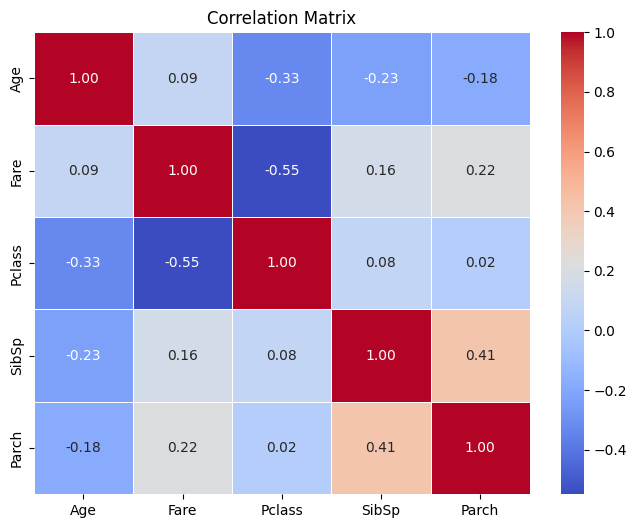

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selection:
num_features = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']

# Create the correlation matrix:
correlation_matrix = titanic[num_features].corr()

# Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Here we see:

*   Age has low correlation with the other variables
*   Fare has a medium correlation with respect to Pclass.Intuitively, it can be taken into account that those with the highest economic class are those who can afford higher rates. The rest of the variables have low or no correlation
*   Pclass: identical to the previous case. It does not have a significant correlation in any variable other than Fare.
* SibSp: It has a medium correlation with Parch. Intuitively, it can be taken into account that those who usually bring their brother may also have their relatives present.

#### PCA

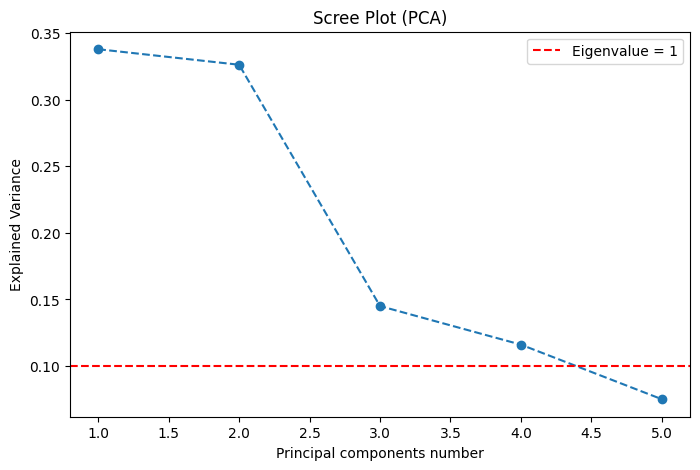

Varianza explicada acumulada:
[0.33776201 0.66387444 0.80887108 0.92491469 1.        ]
Loadings of the principal components:
             PC1       PC2       PC3       PC4       PC5
Age    -0.451501 -0.321306  0.804521  0.070118  0.201838
Fare   -0.562018  0.368488 -0.335107  0.014175  0.660192
Pclass  0.680596 -0.054357  0.186681 -0.038852  0.705319
SibSp   0.125684  0.611986  0.279274  0.721076 -0.108313
Parch   0.035695  0.619272  0.357219 -0.688057 -0.119167


In [44]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Selection
variables = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']
titanic_selected = titanic[variables]

# Escaled
scaler = StandardScaler()
titanic_scaled = scaler.fit_transform(titanic_selected)

# Apply PCA
pca = PCA()
pca_components = pca.fit_transform(titanic_scaled)

# Variance explained
explained_variance = pca.explained_variance_ratio_

# Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot (PCA)')
plt.xlabel('Principal components number')
plt.ylabel('Explained Variance')
plt.axhline(y=0.1, color='r', linestyle='--', label="Eigenvalue = 1")
plt.legend()
plt.show()

# Cumulatived Variance
varianza_acumulada = explained_variance.cumsum()
print("Varianza explicada acumulada:")
print(varianza_acumulada)

# Cargas de los componentes principales
cargas = pd.DataFrame(pca.components_.T, columns=[f"PC{i+1}" for i in range(len(explained_variance))], index=variables)
print("Loadings of the principal components:")
print(cargas)


*   The first component explains the variance 33.6%; the second component explains 0.3263 and the third component explains 14.77%. Their combination explains the variance in 80% of the cases.
*   We select 3 variables to apply PCA
*   The loadings explains the correlations between original variables and the new variable. Example: PC1 has strong relation with Fare and Pclass. PC2 has strong relation with SibSp and Parch and PC3 has strong relation with only Age, which is logical with the argument in the correlation matrix



In [45]:
from sklearn.decomposition import PCA
#We use 3 components
pca = PCA(n_components=3)

In [46]:
pca_df = pd.DataFrame(
    pca_components[:, :3],
    columns=['PCA1', 'PCA2', 'PCA3'])
pca_df

,PCA1,PCA2,PCA3
0,1.152552,-0.066751,-0.205851
1,-1.756946,0.142842,-0.094180
2,0.891901,-0.715920,-0.216167
3,-1.446952,0.082108,-0.157219
4,0.577795,-0.937516,0.340168
...,...,...,...
886,-0.014770,-0.637941,-0.411910
887,-0.743693,-0.248962,-1.245293
888,0.779901,1.393054,1.066947
889,-0.986897,-0.422035,-0.811931


We add the others variables:

In [47]:
df_new = df_num.drop(['Age', 'Fare', 'Pclass', 'SibSp', 'Parch'], axis=1)
df_new.head(5)

,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,onehotencoder__Cabin_Letters_ABC,onehotencoder__Cabin_Letters_DE,onehotencoder__Cabin_Letters_FG,onehotencoder__Cabin_Letters_M,PassengerId,Survived,Numerical_Title,femaleMarried
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,3,0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2,1,4,1
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3,1,2,0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,4,1,4,1
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5,0,3,0


In [48]:
#We unify the values of PCA and the previous titanic
df_new_num = pd.concat([df_new, pca_df], axis=1)
df_new_num.head(5)

,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,onehotencoder__Cabin_Letters_ABC,onehotencoder__Cabin_Letters_DE,onehotencoder__Cabin_Letters_FG,onehotencoder__Cabin_Letters_M,PassengerId,Survived,Numerical_Title,femaleMarried,PCA1,PCA2,PCA3
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,3,0,1.152552,-0.066751,-0.205851
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2,1,4,1,-1.756946,0.142842,-0.094180
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3,1,2,0,0.891901,-0.715920,-0.216167
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,4,1,4,1,-1.446952,0.082108,-0.157219
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5,0,3,0,0.577795,-0.937516,0.340168


In [49]:
df_new_num.dropna(inplace = True)
X = df_new_num.drop('Survived',axis=1)
y = df_new_num['Survived']

#### Random Forest

In [50]:
from sklearn.model_selection import train_test_split
#Train y Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2) # Instance the object
clf.fit(X_train, y_train) # Adjust
y_pred = clf.predict(X_test) #Prediction

precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)
auc_rf = roc_auc_score(y_test, y_pred)

print(precision_rf,recall_rf,f1_rf,auc_rf)


0.7878787878787878 0.7027027027027027 0.7428571428571429 0.7844723704596316


#### KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

neigh = KNeighborsClassifier(n_neighbors=3) #Instance the object
neigh.fit(X_train, y_train) # Adjust
y_pred = neigh.predict(X_test) #Prediction

precision_knn = precision_score(y_test, y_pred)
recall_knn = recall_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred)
auc_knn = roc_auc_score(y_test, y_pred)

print(precision_knn,recall_knn,f1_knn,auc_knn)

0.4819277108433735 0.36036036036036034 0.41237113402061853 0.5432375050209445


#### Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)


precision_rl = precision_score(y_test, y_pred)
recall_rl = recall_score(y_test, y_pred)
f1_rl = f1_score(y_test, y_pred)
auc_rl = roc_auc_score(y_test, y_pred)

print(precision_rl,recall_rl,f1_rl,auc_rl)

0.7850467289719626 0.7567567567567568 0.7706422018348624 0.8051299707350663


#### Evaluation

In [53]:
results = {
    'Model PCA': ['Random Forest', 'KNN', 'Logistic Regression'],
    'Precition PCA': [precision_rf, precision_knn, precision_rl],
    'Recall PCA': [recall_rf, recall_knn, recall_rl],
    'F1-Score PCA': [f1_rf, f1_knn, f1_rl],
    'AUC-ROC PCA': [auc_rf, auc_knn, auc_rl]
}

results_df_3 = pd.DataFrame(results)
results_df_3

,Model PCA,Precition PCA,Recall PCA,F1-Score PCA,AUC-ROC PCA
0,Random Forest,0.787879,0.702703,0.742857,0.784472
1,KNN,0.481928,0.360360,0.412371,0.543238
2,Logistic Regression,0.785047,0.756757,0.770642,0.805130


In [54]:
results_df_3 = results_df_3.drop(columns='Model PCA') #Drop this column
comparison_results_1 = pd.concat([results_df_1, results_df_3], axis=1)
comparison_results_1

,Model,Precition,Recall,F1-Score,AUC-ROC,Precition PCA,Recall PCA,F1-Score PCA,AUC-ROC PCA
0,Random Forest,0.772277,0.702703,0.735849,0.778103,0.787879,0.702703,0.742857,0.784472
1,KNN,0.487179,0.342342,0.402116,0.543783,0.481928,0.360360,0.412371,0.543238
2,Logistic Regression,0.792453,0.756757,0.774194,0.808315,0.785047,0.756757,0.770642,0.805130


As can be seen, the use of PCA did not bring a significant improvement to the metrics according to the first execution of the models.

####  Hyperparameter Tuning

Now, We'll use Hyperparameters:

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier()
params_grid = {
        'n_estimators': [10, 100, 200], # Number of trees
        'max_depth': [3, 5, 7, 10, 15], # Depth
        'min_samples_split': [2, 5, 10], #The minimum number of samples required to split an internal node.
        'criterion':['entropy','gini']
        }
grid_cv = RandomizedSearchCV(clf, params_grid, scoring="accuracy", n_jobs=-1, cv=3)
grid_cv.fit(X_train, y_train)

print("Mejores parametros", grid_cv.best_params_)
print("Mejor score de CV", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 5)}')
precision_rf = precision_score(y_test, grid_cv.predict(X_test))
recall_rf = recall_score(y_test, grid_cv.predict(X_test))
f1_rf = f1_score(y_test, grid_cv.predict(X_test))
auc_rf = roc_auc_score(y_test, grid_cv.predict(X_test))
print(precision_rf,recall_rf,f1_rf,auc_rf)

Mejores parametros {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 7, 'criterion': 'entropy'}
Mejor score de CV 0.8282237086584913
Accuracy del modelo = 0.8209
0.8247422680412371 0.7207207207207207 0.7692307692307693 0.8062202329718253


In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

neigh = KNeighborsClassifier() #instanciar el objeto

params_grid = { 'n_neighbors' : [3,4,5,6,7,9,11,13,15], # Numero de vecinos
               'weights' : ['uniform','distance'],  # Uniforme se refiere a que todos los puntos de un grupo tienen el mismo peso, distancia es cuando toma relevancia la cercania entre un punto y otro del grupo
               'metric' : ['minkowski','euclidean','manhattan']} # Tipo de distancia

grid_cv = RandomizedSearchCV(neigh, params_grid, scoring="accuracy", n_jobs=-1, cv=3) # Usamos este modelo por su rapidez a la hora de la ejecucion
grid_cv.fit(X_train, y_train)

print("Mejores parametros", grid_cv.best_params_)
print("Mejor score de CV", grid_cv.best_score_)
print(f'Model Accuracy = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 5)}')
precision_knn = precision_score(y_test, grid_cv.predict(X_test))
recall_knn = recall_score(y_test, grid_cv.predict(X_test))
f1_knn = f1_score(y_test, grid_cv.predict(X_test))
auc_knn = roc_auc_score(y_test, grid_cv.predict(X_test))
print(precision_knn,recall_knn,f1_knn,auc_knn)

Mejores parametros {'weights': 'uniform', 'n_neighbors': 9, 'metric': 'manhattan'}
Mejor score de CV 0.6371934225195095
Model Accuracy = 0.60821
0.575 0.2072072072072072 0.304635761589404 0.5494634762150686


In [57]:
from sklearn.linear_model import LogisticRegression
logModel = LogisticRegression()

params_grid = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [50, 100, 500, 1000,2500, 5000]}    #Extracted code from kaggle example

grid_cv = RandomizedSearchCV(logModel, params_grid, scoring="accuracy", n_jobs=-1, cv=3)
grid_cv.fit(X_train, y_train)

print("Mejores parametros", grid_cv.best_params_)
print("Mejor score de CV", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 5)}')
precision_rl = precision_score(y_test, grid_cv.predict(X_test))
recall_rl = recall_score(y_test, grid_cv.predict(X_test))
f1_rl = f1_score(y_test, grid_cv.predict(X_test))
auc_rl = roc_auc_score(y_test, grid_cv.predict(X_test))
print(precision_rl,recall_rl,f1_rl,auc_rl)

Mejores parametros {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 100, 'C': 4.281332398719396}
Mejor score de CV 0.807398117180726
Accuracy del modelo = 0.80224
0.7543859649122807 0.7747747747747747 0.7644444444444445 0.7982154128650945


In [58]:
results = {
    'Model PCA': ['Random Forest', 'KNN', 'Logistic Regression'],
    'Precition PCA': [precision_rf, precision_knn, precision_rl],
    'Recall PCA': [recall_rf, recall_knn, recall_rl],
    'F1-Score PCA': [f1_rf, f1_knn, f1_rl],
    'AUC-ROC PCA': [auc_rf, auc_knn, auc_rl]
}

results_df_4 = pd.DataFrame(results)
results_df_4

,Model PCA,Precition PCA,Recall PCA,F1-Score PCA,AUC-ROC PCA
0,Random Forest,0.824742,0.720721,0.769231,0.806220
1,KNN,0.575000,0.207207,0.304636,0.549463
2,Logistic Regression,0.754386,0.774775,0.764444,0.798215


In [59]:
results_df_4 = results_df_4.drop(columns='Model PCA') #Drop this column
comparison_results_2 = pd.concat([results_df_2, results_df_4], axis=1)
comparison_results_2

,Model,Precition,Recall,F1-Score,AUC-ROC,Precition PCA,Recall PCA,F1-Score PCA,AUC-ROC PCA
0,Random Forest,0.819149,0.693694,0.751220,0.792707,0.824742,0.720721,0.769231,0.806220
1,KNN,0.655172,0.342342,0.449704,0.607477,0.575000,0.207207,0.304636,0.549463
2,Logistic Regression,0.752137,0.792793,0.771930,0.804040,0.754386,0.774775,0.764444,0.798215


As can be seen, the use of PCA did not bring a significant improvement to the metrics according to the first execution of the models using hyperparameters

## Outliers

We use the previous dataframe

In [60]:
df_new_num.head()

,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,onehotencoder__Cabin_Letters_ABC,onehotencoder__Cabin_Letters_DE,onehotencoder__Cabin_Letters_FG,onehotencoder__Cabin_Letters_M,PassengerId,Survived,Numerical_Title,femaleMarried,PCA1,PCA2,PCA3
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,3,0,1.152552,-0.066751,-0.205851
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2,1,4,1,-1.756946,0.142842,-0.094180
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3,1,2,0,0.891901,-0.715920,-0.216167
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,4,1,4,1,-1.446952,0.082108,-0.157219
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5,0,3,0,0.577795,-0.937516,0.340168


Outliers visualizations:

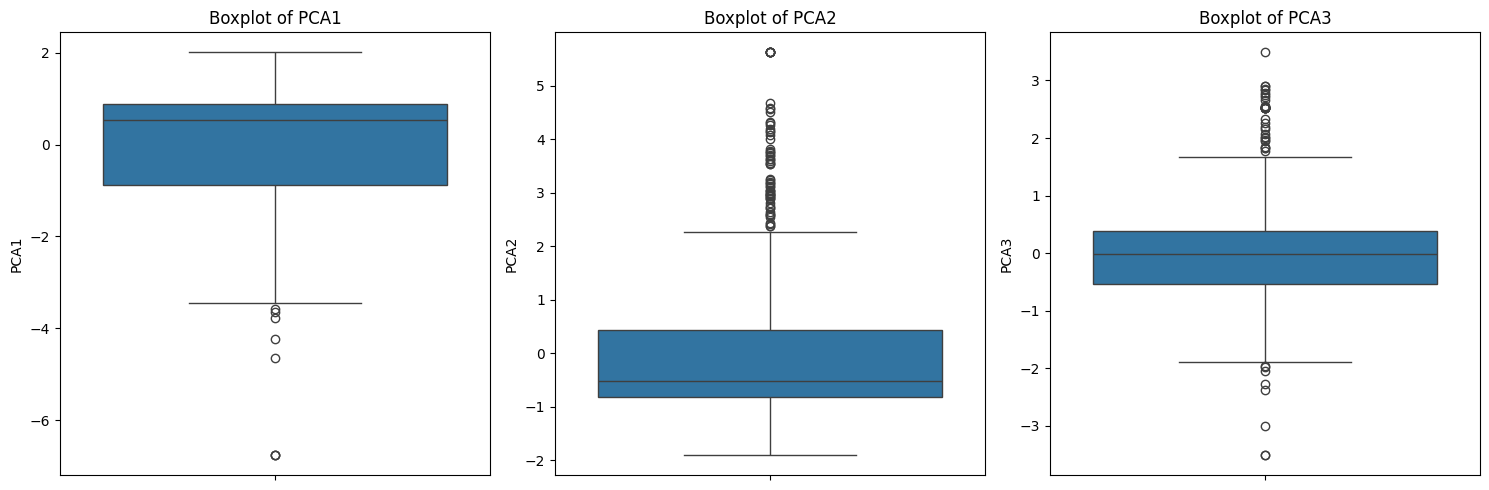

In [61]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(["PCA1", "PCA2", "PCA3"], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df_new_num[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [62]:
# We drop the outliers that are in the columns "PCA1", "PCA2", "PCA3"

import pandas as pd

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Drop the values
df_no_outliers = remove_outliers_iqr(df_new_num, 'PCA1')
df_no_outliers = remove_outliers_iqr(df_no_outliers, 'PCA2')
df_no_outliers = remove_outliers_iqr(df_no_outliers, 'PCA3')

# Print to verify
print(df_no_outliers.head())

   onehotencoder__Sex_female  onehotencoder__Sex_male  \
0                        0.0                      1.0   
1                        1.0                      0.0   
2                        1.0                      0.0   
3                        1.0                      0.0   
4                        0.0                      1.0   

   onehotencoder__Embarked_C  onehotencoder__Embarked_Q  \
0                        0.0                        0.0   
1                        1.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   onehotencoder__Embarked_S  onehotencoder__Cabin_Letters_ABC  \
0                        1.0                               0.0   
1                        0.0                               1.0   
2                        1.0                               0.0   
3                        1.0          

In [63]:
import pandas as pd
from sklearn.ensemble import IsolationForest

# Assuming 'df_new_num' is your numerical DataFrame
# ... (your existing code) ...

# Identify outliers using Isolation Forest
iso_forest = IsolationForest(contamination=0.1) # Adjust contamination as needed
outliers = iso_forest.fit_predict(df_new_num)

# Create a new DataFrame with outlier labels
df_new_num['outlier'] = outliers

# Filter out outliers (outlier values are -1)
df_no_outliers = df_new_num[df_new_num['outlier'] == 1].drop('outlier', axis=1)

# Now df_no_outliers contains the data without outliers
# You can proceed with your modeling using this DataFrame

# Example: using the outlier-free data for RandomForestClassifier
X = df_no_outliers.drop('Survived', axis=1)
y = df_no_outliers['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



### Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2) # Instance the object
clf.fit(X_train, y_train) # Adjust
y_pred = clf.predict(X_test) #Prediction

precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)
auc_rf = roc_auc_score(y_test, y_pred)

print(precision_rf,recall_rf,f1_rf,auc_rf)

0.7101449275362319 0.6805555555555556 0.6950354609929078 0.7811061801446417


### KNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

neigh = KNeighborsClassifier(n_neighbors=3) #Instance the object
neigh.fit(X_train, y_train) # Adjust
y_pred = neigh.predict(X_test) #Prediction

precision_knn = precision_score(y_test, y_pred)
recall_knn = recall_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred)
auc_knn = roc_auc_score(y_test, y_pred)

print(precision_knn,recall_knn,f1_knn,auc_knn)

0.16666666666666666 0.125 0.14285714285714285 0.4293639053254438


### Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)


precision_rl = precision_score(y_test, y_pred)
recall_rl = recall_score(y_test, y_pred)
f1_rl = f1_score(y_test, y_pred)
auc_rl = roc_auc_score(y_test, y_pred)

print(precision_rl,recall_rl,f1_rl,auc_rl)

0.6933333333333334 0.7222222222222222 0.7074829931972789 0.7930637738330046


In [67]:
results = {
    'Model ': ['Random Forest', 'KNN', 'Logistic Regression'],
    'Precition ': [precision_rf, precision_knn, precision_rl],
    'Recall ': [recall_rf, recall_knn, recall_rl],
    'F1-Score ': [f1_rf, f1_knn, f1_rl],
    'AUC-ROC ': [auc_rf, auc_knn, auc_rl]
}

results_df_5 = pd.DataFrame(results)
results_df_5

,Model,Precition,Recall,F1-Score,AUC-ROC
0,Random Forest,0.710145,0.680556,0.695035,0.781106
1,KNN,0.166667,0.125000,0.142857,0.429364
2,Logistic Regression,0.693333,0.722222,0.707483,0.793064


### Hyperparameter Tuning

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier()
params_grid = {
        'n_estimators': [10, 100, 200], # Number of trees
        'max_depth': [3, 5, 7, 10, 15], # Depth
        'min_samples_split': [2, 5, 10], #The minimum number of samples required to split an internal node.
        'criterion':['entropy','gini']
        }
grid_cv = RandomizedSearchCV(clf, params_grid, scoring="accuracy", n_jobs=-1, cv=3)
grid_cv.fit(X_train, y_train)

print("Mejores parametros", grid_cv.best_params_)
print("Mejor score de CV", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 5)}')
precision_rf = precision_score(y_test, grid_cv.predict(X_test))
recall_rf = recall_score(y_test, grid_cv.predict(X_test))
f1_rf = f1_score(y_test, grid_cv.predict(X_test))
auc_rf = roc_auc_score(y_test, grid_cv.predict(X_test))
print(precision_rf,recall_rf,f1_rf,auc_rf)

Mejores parametros {'n_estimators': 200, 'min_samples_split': 10, 'max_depth': 15, 'criterion': 'entropy'}
Mejor score de CV 0.818181818181818
Accuracy del modelo = 0.86307
0.7910447761194029 0.7361111111111112 0.762589928057554 0.8266354372123604


In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

neigh = KNeighborsClassifier() #instanciar el objeto

params_grid = { 'n_neighbors' : [3,4,5,6,7,9,11,13,15], # Numero de vecinos
               'weights' : ['uniform','distance'],  # Uniforme se refiere a que todos los puntos de un grupo tienen el mismo peso, distancia es cuando toma relevancia la cercania entre un punto y otro del grupo
               'metric' : ['minkowski','euclidean','manhattan']} # Tipo de distancia

grid_cv = RandomizedSearchCV(neigh, params_grid, scoring="accuracy", n_jobs=-1, cv=3) # Usamos este modelo por su rapidez a la hora de la ejecucion
grid_cv.fit(X_train, y_train)

print("Mejores parametros", grid_cv.best_params_)
print("Mejor score de CV", grid_cv.best_score_)
print(f'Model Accuracy = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 5)}')
precision_knn = precision_score(y_test, grid_cv.predict(X_test))
recall_knn = recall_score(y_test, grid_cv.predict(X_test))
f1_knn = f1_score(y_test, grid_cv.predict(X_test))
auc_knn = roc_auc_score(y_test, grid_cv.predict(X_test))
print(precision_knn,recall_knn,f1_knn,auc_knn)

Mejores parametros {'weights': 'uniform', 'n_neighbors': 6, 'metric': 'manhattan'}
Mejor score de CV 0.6363636363636364
Model Accuracy = 0.65145
0.25 0.08333333333333333 0.125 0.48841222879684415


In [70]:
from sklearn.linear_model import LogisticRegression
logModel = LogisticRegression()

params_grid = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [50, 100, 500, 1000,2500, 5000]}    #Extracted code from kaggle example

grid_cv = RandomizedSearchCV(logModel, params_grid, scoring="accuracy", n_jobs=-1, cv=3)
grid_cv.fit(X_train, y_train)

print("Mejores parametros", grid_cv.best_params_)
print("Mejor score de CV", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 5)}')
precision_rl = precision_score(y_test, grid_cv.predict(X_test))
recall_rl = recall_score(y_test, grid_cv.predict(X_test))
f1_rl = f1_score(y_test, grid_cv.predict(X_test))
auc_rl = roc_auc_score(y_test, grid_cv.predict(X_test))
print(precision_rl,recall_rl,f1_rl,auc_rl)

Mejores parametros {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 500, 'C': 29.763514416313132}
Mejor score de CV 0.8128342245989305
Accuracy del modelo = 0.80913
0.6625 0.7361111111111112 0.6973684210526315 0.7881738987508218


In [71]:
results = {
    'Model PCA Out': ['Random Forest', 'KNN', 'Logistic Regression'],
    'Precition PCA Out': [precision_rf, precision_knn, precision_rl],
    'Recall PCA Out': [recall_rf, recall_knn, recall_rl],
    'F1-Score PCA Out': [f1_rf, f1_knn, f1_rl],
    'AUC-ROC PCA Out': [auc_rf, auc_knn, auc_rl]
}

results_df_6 = pd.DataFrame(results)
results_df_6

,Model PCA Out,Precition PCA Out,Recall PCA Out,F1-Score PCA Out,AUC-ROC PCA Out
0,Random Forest,0.791045,0.736111,0.762590,0.826635
1,KNN,0.250000,0.083333,0.125000,0.488412
2,Logistic Regression,0.662500,0.736111,0.697368,0.788174


##**Conclusions**

*   Reducing Outliers does not improve significantly the metrics
*   PCA does not improve significantly the metrics
*   We can recommend to use Random Forest or Logistic Regression
*   We don't recommend to use KNN
*   The model with the high AUC ROC was the Random Forest with Outliers Reduction and Hyperparameter Tunning
*   The model with the high metrics in Precition is Random Forest with PCA and Hyperparameter Tunning



## Recommendations


*   Look for another techniques to imput the nulls
*   Review another classifications algoritms
*   Improve the feature engineering, there are some ideas: group the age, unify the familiar group.

